## SIGNATE Assessment

In [1]:
import sys
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

%matplotlib inline

import check_miss_value as chv

Using TensorFlow backend.


In [2]:
train_pd = pd.read_csv('../000_data/train.csv')
test_pd = pd.read_csv('../000_data/test.csv')

In [3]:
train_pd.shape, test_pd.shape

((55583, 29), (18528, 28))

In [4]:
train_pd.describe()

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
count,55583.000000,55583.000000,55436.000000,55512.000000,55487.000000,55583.000000,55583.000000,55583.000000,43027.000000,55583.000000
mean,27791.000000,3.152906,1.236426,1.265312,1.711770,38.450812,-92.342406,20.937283,94.077928,160.163647
std,16045.574343,2.153001,0.583074,0.849319,1.257822,3.080869,21.687844,37.951889,7.802154,168.087140
min,0.000000,1.000000,0.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,1.000000
25%,13895.500000,2.000000,1.000000,1.000000,1.000000,34.128205,-118.341876,1.000000,92.000000,74.000000
50%,27791.000000,2.000000,1.000000,1.000000,1.000000,40.663312,-76.995602,6.000000,96.000000,111.000000
75%,41686.500000,4.000000,1.000000,1.000000,2.000000,40.746146,-73.954703,23.000000,100.000000,185.000000
max,55582.000000,16.000000,8.000000,10.000000,18.000000,42.390437,-70.999166,605.000000,100.000000,1999.000000


In [5]:
test_pd.describe()

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating
count,18528.000000,18528.000000,18475.000000,18508.000000,18493.000000,18528.000000,18528.000000,18528.000000,14362.000000
mean,9263.500000,3.161863,1.231773,1.267236,1.708160,38.431396,-92.562881,20.790425,94.035719
std,5348.717229,2.155397,0.578944,0.860580,1.243063,3.078096,21.757419,37.457273,7.938919
min,0.000000,1.000000,0.000000,0.000000,0.000000,33.343011,-122.510940,0.000000,20.000000
25%,4631.750000,2.000000,1.000000,1.000000,1.000000,34.126672,-118.344098,1.000000,92.000000
50%,9263.500000,2.000000,1.000000,1.000000,1.000000,40.658229,-77.000323,6.000000,96.000000
75%,13895.250000,4.000000,1.000000,1.000000,2.000000,40.745958,-73.954432,23.000000,100.000000
max,18527.000000,16.000000,8.000000,10.000000,16.000000,42.390248,-70.985047,451.000000,100.000000


In [6]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55583 non-null  int64  
 1   accommodates            55583 non-null  int64  
 2   amenities               55583 non-null  object 
 3   bathrooms               55436 non-null  float64
 4   bed_type                55583 non-null  object 
 5   bedrooms                55512 non-null  float64
 6   beds                    55487 non-null  float64
 7   cancellation_policy     55583 non-null  object 
 8   city                    55583 non-null  object 
 9   cleaning_fee            55583 non-null  object 
 10  description             55583 non-null  object 
 11  first_review            43675 non-null  object 
 12  host_has_profile_pic    55435 non-null  object 
 13  host_identity_verified  55435 non-null  object 
 14  host_response_rate      41879 non-null

In [7]:
test_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18528 non-null  int64  
 1   accommodates            18528 non-null  int64  
 2   amenities               18528 non-null  object 
 3   bathrooms               18475 non-null  float64
 4   bed_type                18528 non-null  object 
 5   bedrooms                18508 non-null  float64
 6   beds                    18493 non-null  float64
 7   cancellation_policy     18528 non-null  object 
 8   city                    18528 non-null  object 
 9   cleaning_fee            18528 non-null  object 
 10  description             18528 non-null  object 
 11  first_review            14572 non-null  object 
 12  host_has_profile_pic    18488 non-null  object 
 13  host_identity_verified  18488 non-null  object 
 14  host_response_rate      13933 non-null

In [8]:
train_pd.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,...,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [9]:
test_pd.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,...,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,...,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,...,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,2.0,strict,NYC,f,...,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.5,Real Bed,1.0,2.0,strict,LA,t,...,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


In [10]:
train_pd.corr()

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
id,1.000000,0.005027,0.005182,0.002463,0.005736,-0.007358,-0.005771,0.004658,0.002307,-0.001129
accommodates,0.005027,1.000000,0.502278,0.708510,0.806654,-0.079395,-0.086365,0.042320,-0.017824,0.522330
bathrooms,0.005182,0.502278,1.000000,0.586366,0.524847,-0.135427,-0.132046,-0.040262,0.006698,0.456044
bedrooms,0.002463,0.708510,0.586366,1.000000,0.708230,-0.057502,-0.074027,-0.033761,0.009996,0.495830
beds,0.005736,0.806654,0.524847,0.708230,1.000000,-0.080307,-0.082434,0.030914,-0.027839,0.435603
latitude,-0.007358,-0.079395,-0.135427,-0.057502,-0.080307,1.000000,0.896581,-0.016439,-0.035133,-0.028940
longitude,-0.005771,-0.086365,-0.132046,-0.074027,-0.082434,0.896581,1.000000,-0.048660,-0.050019,-0.056236
number_of_reviews,0.004658,0.042320,-0.040262,-0.033761,0.030914,-0.016439,-0.048660,1.000000,0.012144,-0.068944
review_scores_rating,0.002307,-0.017824,0.006698,0.009996,-0.027839,-0.035133,-0.050019,0.012144,1.000000,0.065896
y,-0.001129,0.522330,0.456044,0.495830,0.435603,-0.028940,-0.056236,-0.068944,0.065896,1.000000


In [11]:
train_pd.corr()[train_pd.corr() > 0.3]

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,NaN,1.000000,0.502278,0.708510,0.806654,NaN,NaN,NaN,NaN,0.522330
bathrooms,NaN,0.502278,1.000000,0.586366,0.524847,NaN,NaN,NaN,NaN,0.456044
bedrooms,NaN,0.708510,0.586366,1.000000,0.708230,NaN,NaN,NaN,NaN,0.495830
beds,NaN,0.806654,0.524847,0.708230,1.000000,NaN,NaN,NaN,NaN,0.435603
latitude,NaN,NaN,NaN,NaN,NaN,1.000000,0.896581,NaN,NaN,NaN
longitude,NaN,NaN,NaN,NaN,NaN,0.896581,1.000000,NaN,NaN,NaN
number_of_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
review_scores_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
y,NaN,0.522330,0.456044,0.495830,0.435603,NaN,NaN,NaN,NaN,1.000000


In [12]:
train_pd.corr()[train_pd.corr() < -0.3]

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
train_pd.corr()[['y']]

,y
id,-0.001129
accommodates,0.522330
bathrooms,0.456044
bedrooms,0.495830
beds,0.435603
latitude,-0.028940
longitude,-0.056236
number_of_reviews,-0.068944
review_scores_rating,0.065896
y,1.000000


In [14]:
train_pd.accommodates.value_counts()

2     23928
4      9017
1      7094
3      5808
6      3753
5      2593
8      1331
7       708
10      516
16      229
9       203
12      191
14       76
11       68
15       40
13       28
Name: accommodates, dtype: int64

In [15]:
# 収容人数
accommodates_grp = train_pd.groupby('accommodates', as_index=True).median()
accommodates_grp

,id,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
accommodates,,,,,,,,,
1,27925.0,1.0,1.0,1.0,40.685253,-73.989420,2.0,97.0,63.0
2,27769.5,1.0,1.0,1.0,40.678787,-74.004183,6.0,96.0,90.0
3,27399.0,1.0,1.0,1.0,40.670713,-74.051667,7.0,96.0,120.0
4,27948.0,1.0,1.0,2.0,40.586562,-77.026197,7.0,96.0,150.0
5,27591.0,1.0,2.0,3.0,38.930569,-77.040007,7.0,95.0,185.0
6,28505.0,1.5,2.0,3.0,38.904344,-87.666478,8.0,96.0,225.0
7,25730.5,2.0,3.0,4.0,38.910334,-87.652550,9.0,96.0,248.5
8,29084.0,2.0,3.0,4.0,38.888177,-87.720021,9.0,95.0,300.0
9,34461.0,2.0,3.0,5.0,38.885266,-87.709269,9.0,95.0,298.0


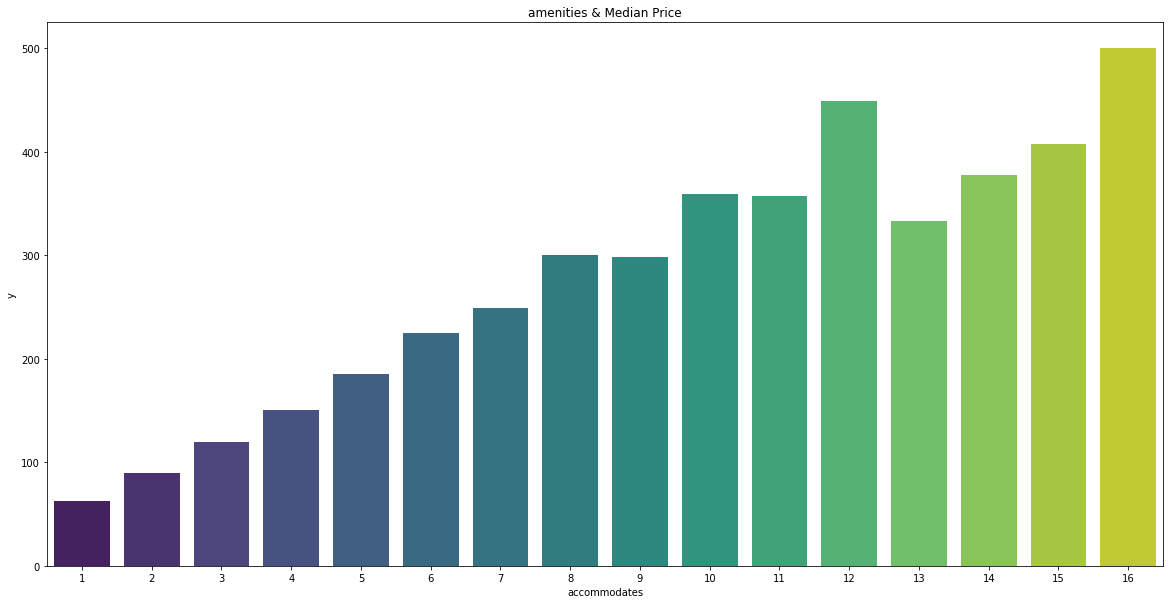

In [16]:
# 収容人数と価格のグラフを表示
plt.figure(figsize=(20, 10))
plt.title('amenities & Median Price')
sns.barplot(x=accommodates_grp.index, y='y', data=accommodates_grp, palette='viridis')

In [17]:
train_pd.bathrooms.value_counts()

1.0    43469
2.0     6042
1.5     2875
2.5     1186
3.0      793
3.5      308
4.0      223
0.0      156
0.5      154
4.5       82
5.0       49
8.0       37
5.5       28
6.0       14
7.0        8
6.5        8
7.5        4
Name: bathrooms, dtype: int64

In [18]:
# 風呂数
bathrooms_grp = train_pd.groupby('bathrooms', as_index=True).median()
bathrooms_grp

,id,accommodates,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
bathrooms,,,,,,,,,
0.0,28642.5,2.0,1.0,1.0,34.209569,-118.234735,8.0,94.0,65.0
0.5,29376.0,2.0,1.0,1.0,34.180596,-118.134125,3.0,95.0,65.0
1.0,27765.0,2.0,1.0,1.0,40.680903,-74.002069,6.0,96.0,100.0
1.5,28199.0,2.0,1.0,1.0,38.920638,-77.024802,5.0,97.0,105.0
2.0,27469.0,5.0,2.0,2.0,37.803429,-117.830979,6.0,96.0,199.0
2.5,27662.0,6.0,3.0,3.0,37.796330,-117.911504,4.0,97.0,280.0
3.0,28661.0,6.0,3.0,4.0,34.150786,-118.314069,6.0,96.0,325.0
3.5,30641.5,8.0,4.0,4.0,37.749578,-118.238020,3.0,99.0,475.0
4.0,30289.0,8.0,4.0,5.0,34.142655,-118.282794,4.0,93.5,489.0


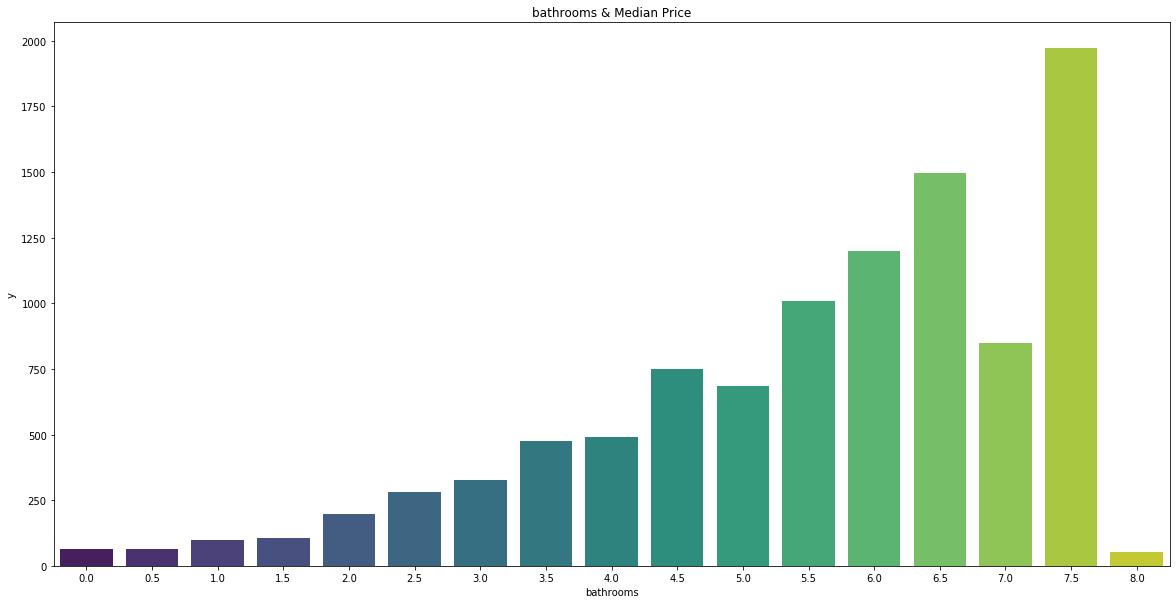

In [19]:
# 風呂数と価格のグラフを表示
plt.figure(figsize=(20, 10))
plt.title('bathrooms & Median Price')
sns.barplot(x=bathrooms_grp.index, y='y', data=bathrooms_grp, palette='viridis')

In [20]:
train_pd.bed_type.value_counts()

Real Bed         53989
Futon              569
Pull-out Sofa      453
Airbed             364
Couch              208
Name: bed_type, dtype: int64

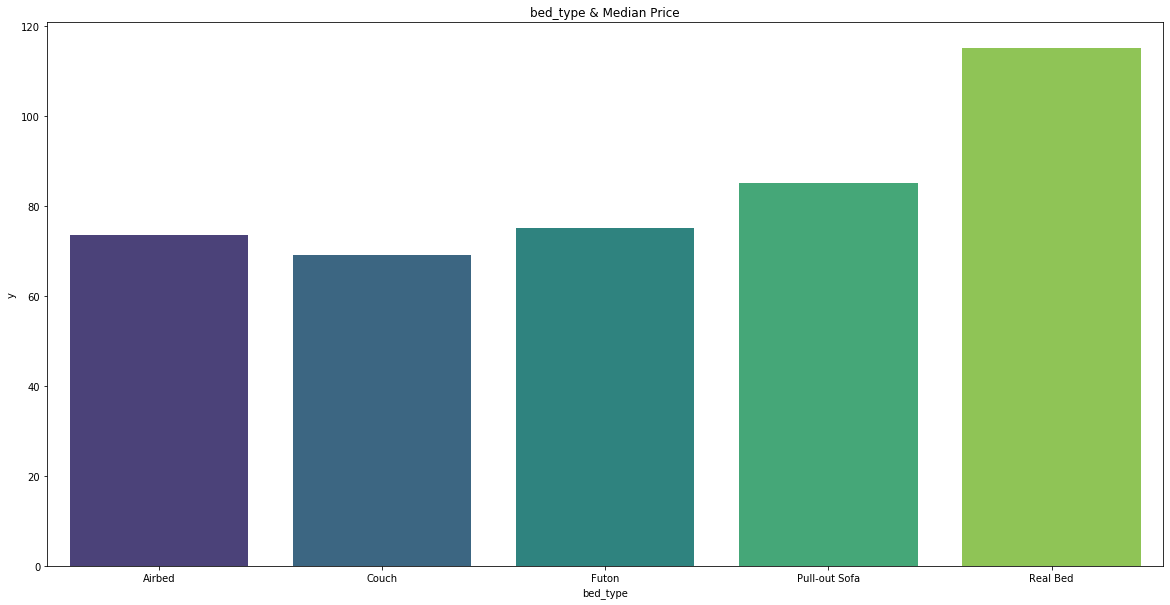

In [21]:
# ベッドのタイプと価格
bed_type_grp = train_pd.groupby('bed_type', as_index=True).median()

plt.figure(figsize=(20, 10))
plt.title('bed_type & Median Price')
sns.barplot(x=bed_type_grp.index, y='y', data=bed_type_grp, palette='viridis')

In [22]:
train_pd.bedrooms.value_counts()

1.0     37338
2.0      8575
0.0      5016
3.0      3195
4.0       994
5.0       267
6.0        78
7.0        26
8.0        10
10.0        9
9.0         4
Name: bedrooms, dtype: int64

In [23]:
# ベッドルーム数
bedrooms_grp = train_pd.groupby('bedrooms', as_index=True).median()
bedrooms_grp

,id,accommodates,bathrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
bedrooms,,,,,,,,,
0.0,27446.0,2.0,1.0,1.0,40.658685,-77.003924,7.0,96.0,120.0
1.0,27829.5,2.0,1.0,1.0,40.676477,-74.004107,5.0,96.0,90.0
2.0,27736.0,4.0,1.0,2.0,38.954817,-77.043190,7.0,96.0,195.0
3.0,28024.0,6.0,2.0,3.0,38.888165,-87.701839,6.0,96.0,275.0
4.0,28021.5,8.0,2.5,5.0,37.775962,-118.073363,5.0,97.0,400.0
5.0,27342.0,10.0,3.5,6.0,37.757000,-118.016526,5.0,97.0,500.0
6.0,18212.5,12.0,4.0,7.0,34.175469,-118.288605,2.5,96.5,750.0
7.0,18819.5,16.0,4.5,10.0,34.161713,-117.946126,7.0,97.0,775.0
8.0,34813.0,16.0,4.5,11.5,34.147954,-118.041231,4.0,96.0,650.0


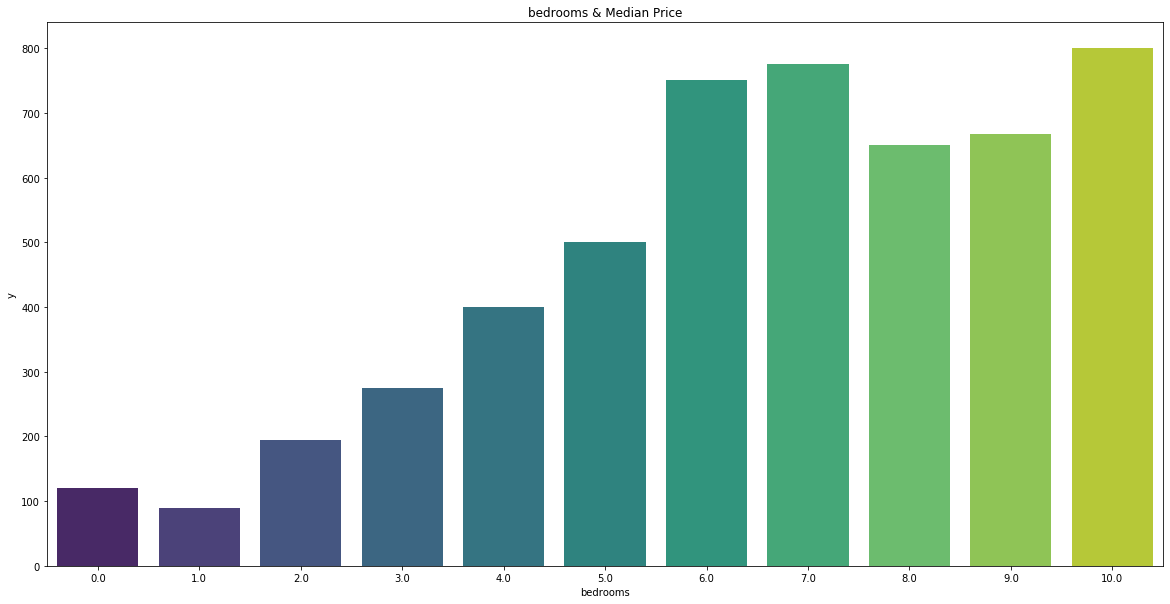

In [24]:
# ベッドルーム数と価格のグラフを表示
plt.figure(figsize=(20, 10))
plt.title('bedrooms & Median Price')
sns.barplot(x=bedrooms_grp.index, y='y', data=bedrooms_grp, palette='viridis')

In [25]:
train_pd.cancellation_policy.value_counts()

strict             24318
flexible           16886
moderate           14288
super_strict_30       78
super_strict_60       13
Name: cancellation_policy, dtype: int64

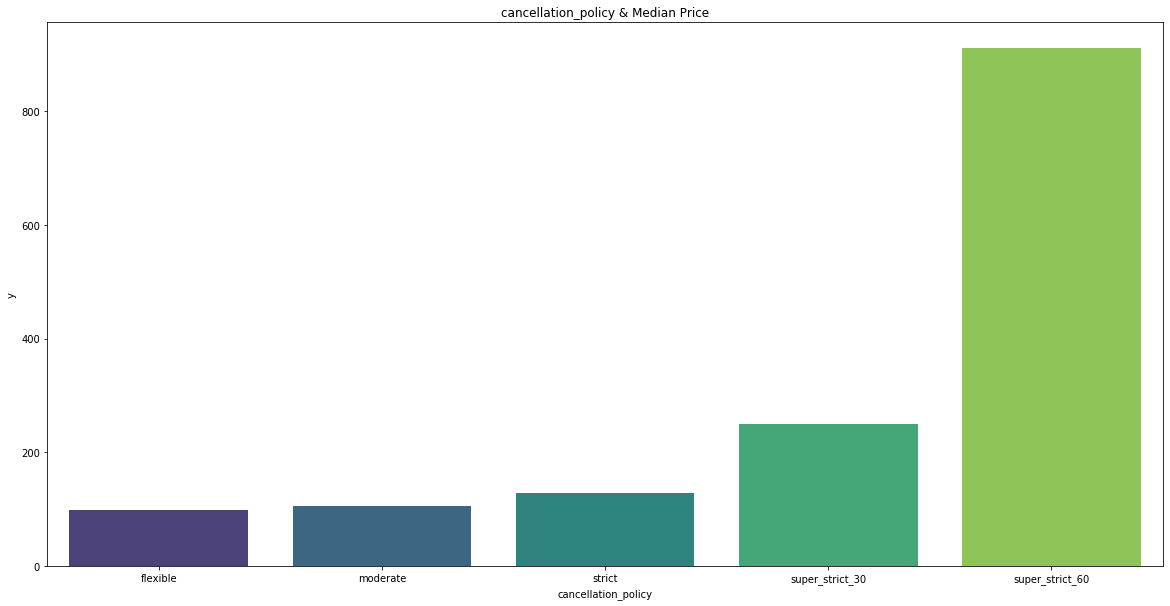

In [26]:
# キャンセルポリシーと価格
cancellation_policy_grp = train_pd.groupby('cancellation_policy', as_index=True).median()

plt.figure(figsize=(20, 10))
plt.title('cancellation_policy & Median Price')
sns.barplot(x=cancellation_policy_grp.index, y='y', data=cancellation_policy_grp, palette='viridis')

In [27]:
train_pd.city.value_counts()

NYC        24326
LA         16828
SF          4768
DC          4259
Chicago     2807
Boston      2595
Name: city, dtype: int64

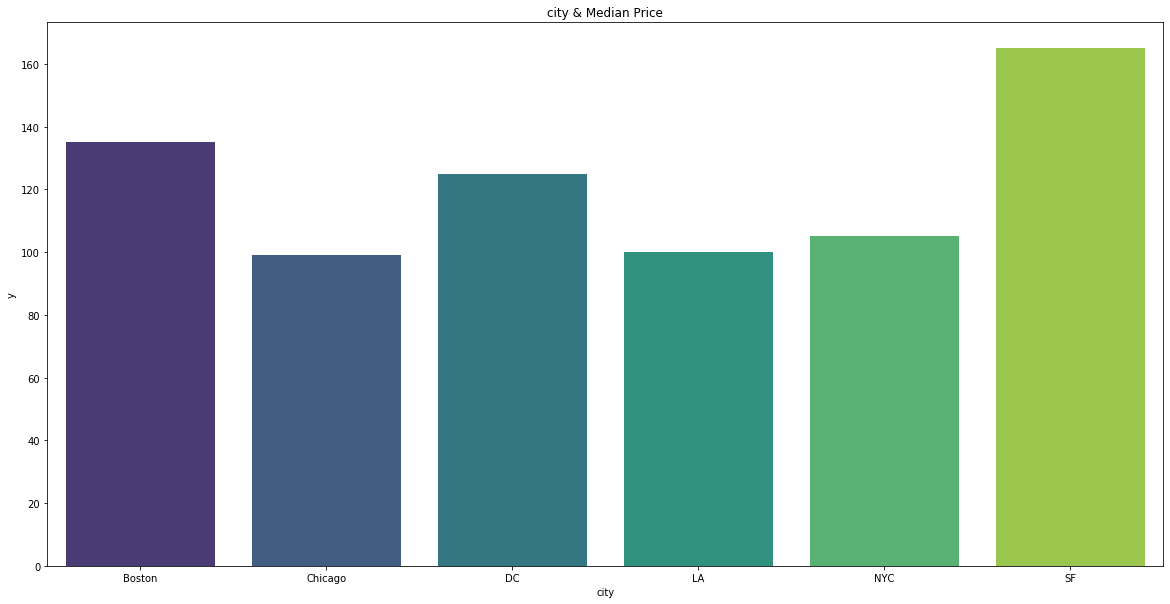

In [28]:
# 都市と価格
city_grp = train_pd.groupby('city', as_index=True).median()

plt.figure(figsize=(20, 10))
plt.title('city & Median Price')
sns.barplot(x=city_grp.index, y='y', data=city_grp, palette='viridis')

In [29]:
train_pd.cleaning_fee.value_counts()

t    40821
f    14762
Name: cleaning_fee, dtype: int64

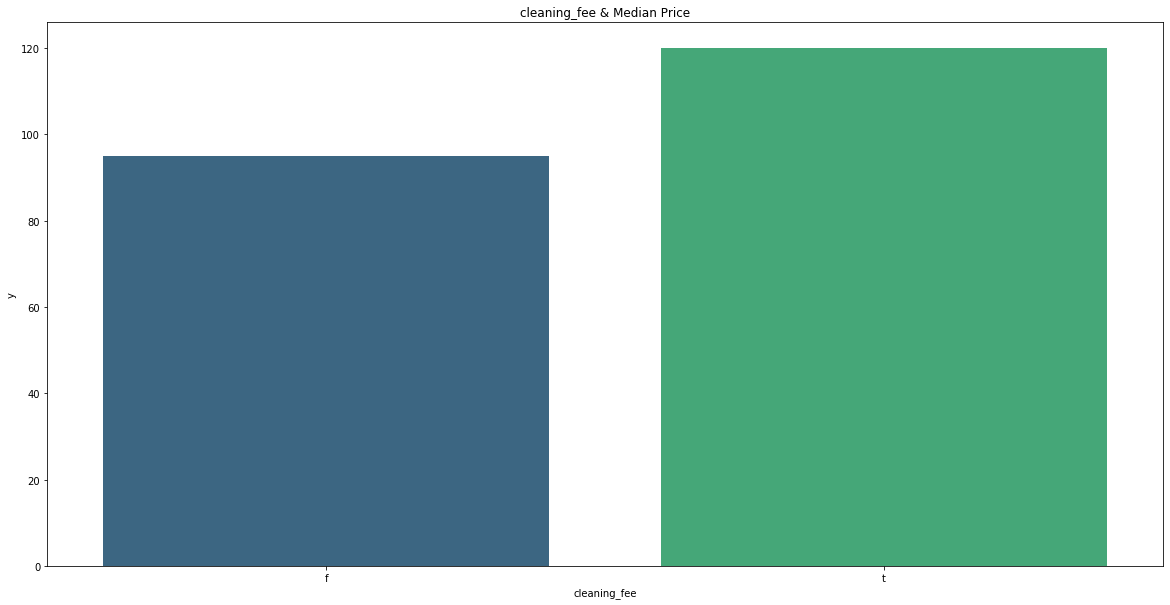

In [30]:
# クリーニング料金を含むかと価格
cleaning_fee_grp = train_pd.groupby('cleaning_fee', as_index=True).median()

plt.figure(figsize=(20, 10))
plt.title('cleaning_fee & Median Price')
sns.barplot(x=cleaning_fee_grp.index, y='y', data=cleaning_fee_grp, palette='viridis')

In [31]:
train_pd.host_has_profile_pic.value_counts()

t    55265
f      170
Name: host_has_profile_pic, dtype: int64

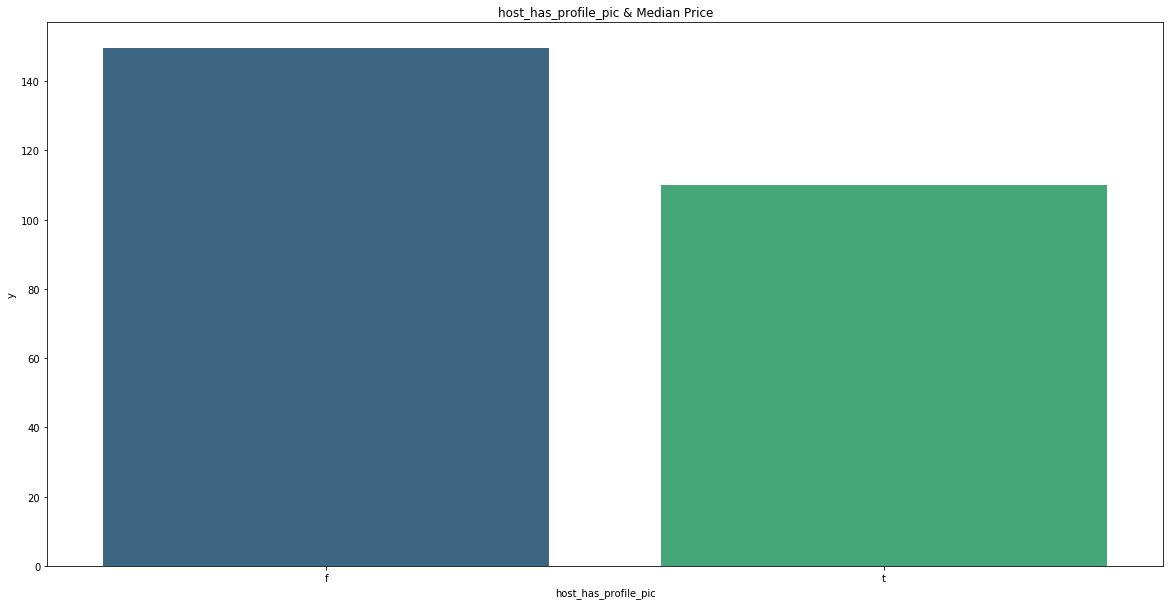

In [32]:
# ホストの写真があるかどうかと価格
host_has_profile_pic_grp = train_pd.groupby('host_has_profile_pic', as_index=True).median()

plt.figure(figsize=(20, 10))
plt.title('host_has_profile_pic & Median Price')
sns.barplot(x=host_has_profile_pic_grp.index, y='y', data=host_has_profile_pic_grp, palette='viridis')

In [33]:
train_pd.host_identity_verified.value_counts()

t    37264
f    18171
Name: host_identity_verified, dtype: int64

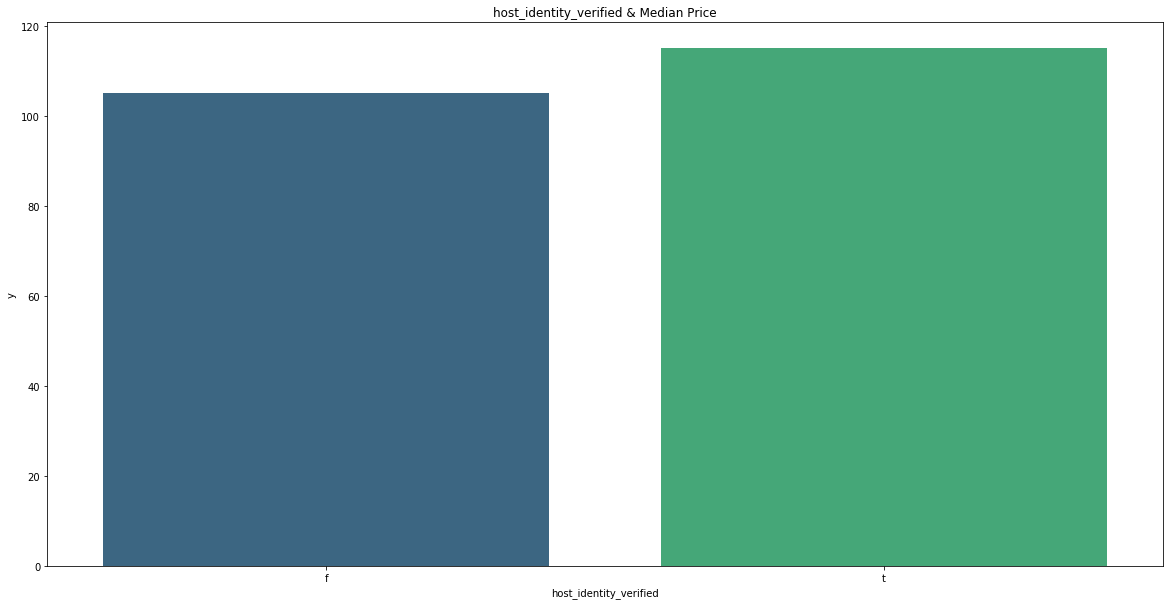

In [34]:
# ホストの身元確認が取れているかと価格
host_identity_verified_grp = train_pd.groupby('host_identity_verified', as_index=True).median()

plt.figure(figsize=(20, 10))
plt.title('host_identity_verified & Median Price')
sns.barplot(x=host_identity_verified_grp.index, y='y', data=host_identity_verified_grp, palette='viridis')

In [35]:
chv.check_miss_value(train_pd)

C:\Users\owner\codexa\600_SIGNATE\001_Assessment\003\check_miss_value.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  miss_table.coulmns = ['欠損数', '%']


,欠損数,%
id,0,0.000000
accommodates,0,0.000000
amenities,0,0.000000
bathrooms,147,0.264469
bed_type,0,0.000000
bedrooms,71,0.127737
beds,96,0.172715
cancellation_policy,0,0.000000
city,0,0.000000
cleaning_fee,0,0.000000


C:\Users\owner\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

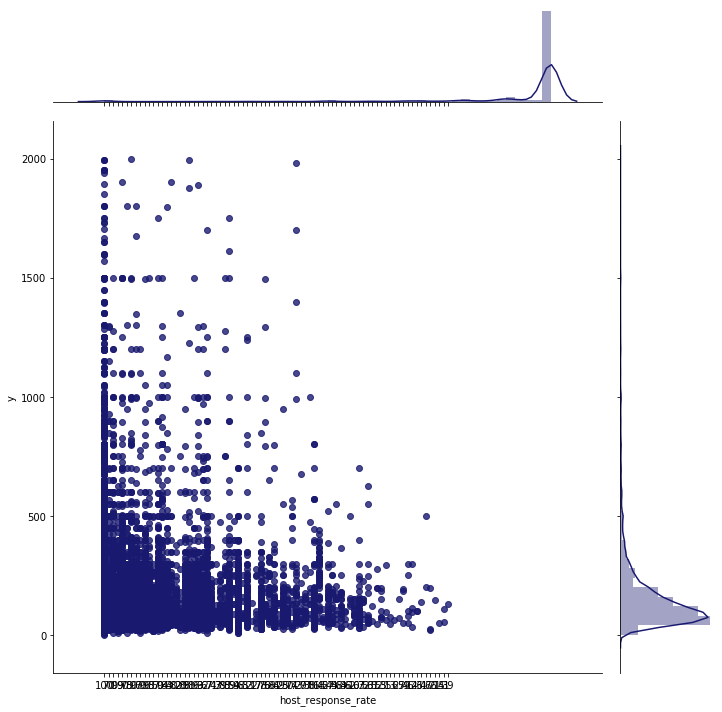

In [36]:
# ホスト返信率と価格の散布図
host_response_rate_pd = train_pd[['host_response_rate', 'y']].copy().dropna()
host_response_rate_pd['host_response_rate'] [host_response_rate_pd['host_response_rate'].isnull()] = '0%'
host_response_rate_pd['host_response_rate'] = host_response_rate_pd.host_response_rate.apply(lambda x: re.sub(r'\D', '', x))

sns.jointplot(y='y', x='host_response_rate', data=host_response_rate_pd, kind='reg', size=10, color='midnightblue')
plt.title('host_response_rate_pd & Median Price')

In [37]:
host_response_rate_pd.shape

(41879, 2)

In [38]:
train_pd.instant_bookable.value_counts()

f    41034
t    14549
Name: instant_bookable, dtype: int64

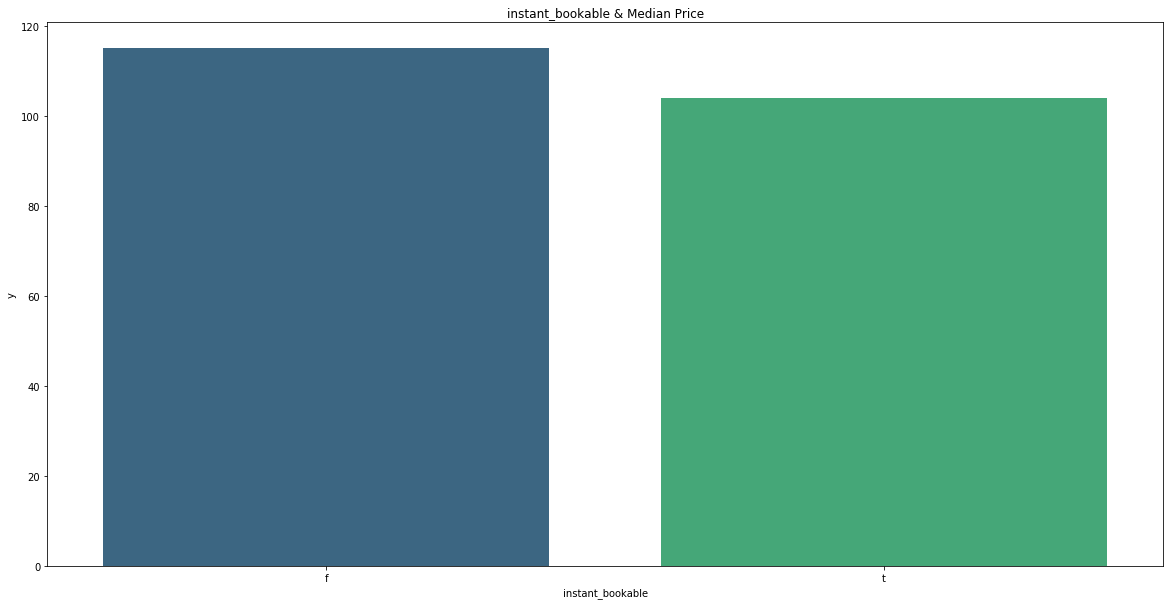

In [39]:
# 即時予約可能かと価格
instant_bookable_grp = train_pd.groupby('instant_bookable', as_index=True).median()

plt.figure(figsize=(20, 10))
plt.title('instant_bookable & Median Price')
sns.barplot(x=instant_bookable_grp.index, y='y', data=instant_bookable_grp, palette='viridis')

In [40]:
train_pd.property_type.value_counts()

Apartment             36826
House                 12326
Condominium            1983
Townhouse              1249
Loft                    914
Other                   448
Guesthouse              392
Bed & Breakfast         349
Bungalow                281
Villa                   131
Dorm                    112
Guest suite              96
Camper/RV                71
In-law                   60
Timeshare                55
Boat                     53
Hostel                   51
Boutique hotel           50
Cabin                    47
Serviced apartment       16
Tent                     14
Vacation home            11
Castle                    9
Yurt                      8
Treehouse                 7
Hut                       7
Earth House               4
Chalet                    4
Tipi                      3
Train                     2
Parking Space             1
Island                    1
Casa particular           1
Cave                      1
Name: property_type, dtype: int64

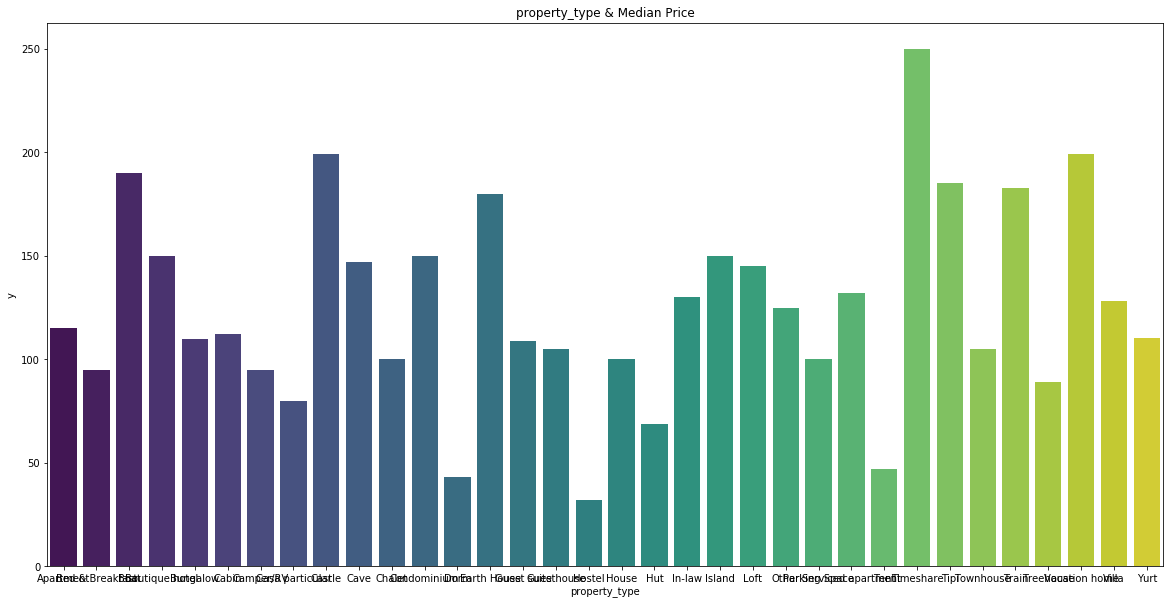

In [41]:
# 物件の種類と価格
property_type_grp = train_pd.groupby('property_type', as_index=True).median()

plt.figure(figsize=(20, 10))
plt.title('property_type & Median Price')
sns.barplot(x=property_type_grp.index, y='y', data=property_type_grp, palette='viridis')

In [42]:
# property_type_grp
property_type_grp.sort_values('y')

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
property_type,,,,,,,,,,
Hostel,21930.0,2.0,2.50,1.0,2.0,34.052835,-118.278316,5.0,89.0,32.0
Dorm,33613.5,2.0,1.00,1.0,1.0,34.076064,-118.312662,10.0,89.0,43.0
Tent,27445.5,2.0,1.00,1.0,1.0,34.087270,-118.317247,11.5,95.0,47.0
Hut,31979.0,2.0,1.00,1.0,1.0,34.001172,-118.460594,19.0,96.0,69.0
Casa particular,48633.0,1.0,1.00,0.0,1.0,34.047855,-118.454382,0.0,NaN,80.0
Treehouse,38777.0,2.0,1.00,1.0,2.0,34.106685,-118.359745,9.0,98.0,89.0
Bed & Breakfast,27578.0,2.0,1.00,1.0,1.0,37.767618,-118.194682,11.0,95.0,95.0
Camper/RV,28012.0,3.0,1.00,1.0,2.0,34.103304,-118.435300,4.0,97.5,95.0
Chalet,34689.5,2.0,1.25,1.0,1.5,40.703938,-73.948706,10.0,96.0,100.0


In [43]:
train_pd.room_type.value_counts()

Entire home/apt    30939
Private room       23023
Shared room         1621
Name: room_type, dtype: int64

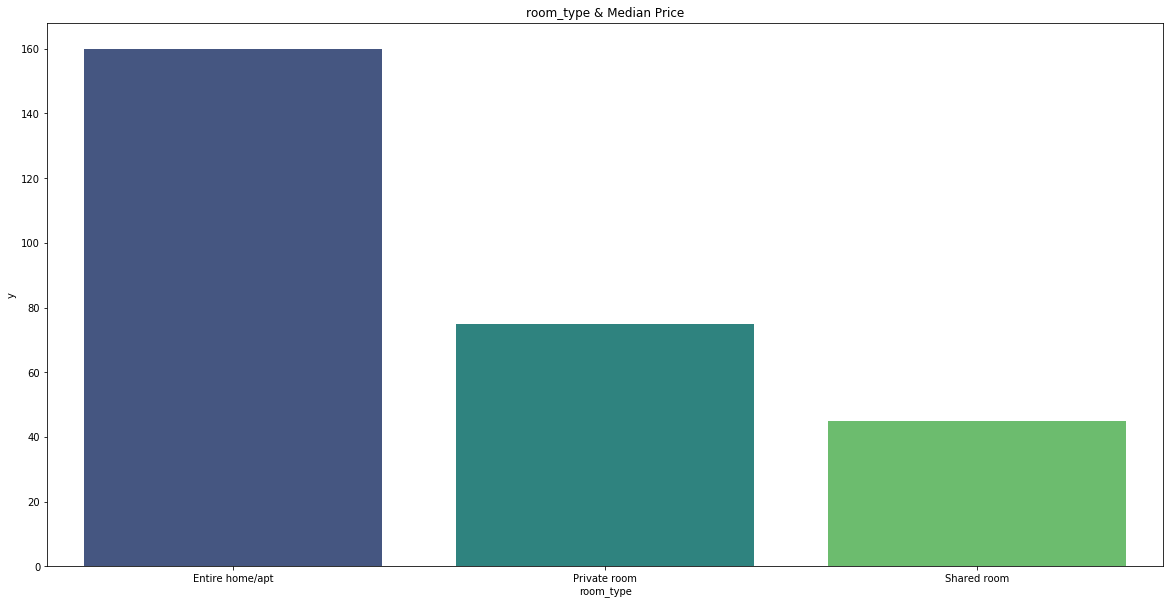

In [44]:
# 部屋の種類かと価格
room_type_grp = train_pd.groupby('room_type', as_index=True).median()

plt.figure(figsize=(20, 10))
plt.title('room_type & Median Price')
sns.barplot(x=room_type_grp.index, y='y', data=room_type_grp, palette='viridis')

## Trainデータ編集

In [156]:
train_cp = train_pd.copy()

In [157]:
train_cp.drop(['amenities', 'bed_type', 'city', 'cleaning_fee', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'property_type', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'host_response_rate'], axis=1, inplace=True)

In [158]:
train_cp = pd.get_dummies(train_cp, drop_first=True, columns=['cancellation_policy', 'room_type'])

In [159]:
# train_cp['host_response_rate'] [train_cp['host_response_rate'].isnull()] = '0%'
# train_cp['host_response_rate'] = train_cp.host_response_rate.apply(lambda x: re.sub(r'\D', '', x))

In [160]:
train_cp.corr()[train_cp.corr() > 0.3]['y']

id                                          NaN
accommodates                           0.522330
bathrooms                              0.456044
bedrooms                               0.495830
beds                                   0.435603
number_of_reviews                           NaN
y                                      1.000000
cancellation_policy_moderate                NaN
cancellation_policy_strict                  NaN
cancellation_policy_super_strict_30         NaN
cancellation_policy_super_strict_60         NaN
room_type_Private room                      NaN
room_type_Shared room                       NaN
Name: y, dtype: float64

In [161]:
train_cp.corr()[train_cp.corr() < -0.3]['y']

id                                          NaN
accommodates                                NaN
bathrooms                                   NaN
bedrooms                                    NaN
beds                                        NaN
number_of_reviews                           NaN
y                                           NaN
cancellation_policy_moderate                NaN
cancellation_policy_strict                  NaN
cancellation_policy_super_strict_30         NaN
cancellation_policy_super_strict_60         NaN
room_type_Private room                -0.359343
room_type_Shared room                       NaN
Name: y, dtype: float64

In [162]:
train_cp.corr()[train_cp.corr() > 0.3][['accommodates', 'bathrooms', 'bedrooms', 'room_type_Private room', 'y']]

,accommodates,bathrooms,bedrooms,room_type_Private room,y
id,NaN,NaN,NaN,NaN,NaN
accommodates,1.000000,0.502278,0.708510,NaN,0.522330
bathrooms,0.502278,1.000000,0.586366,NaN,0.456044
bedrooms,0.708510,0.586366,1.000000,NaN,0.495830
beds,0.806654,0.524847,0.708230,NaN,0.435603
number_of_reviews,NaN,NaN,NaN,NaN,NaN
y,0.522330,0.456044,0.495830,NaN,1.000000
cancellation_policy_moderate,NaN,NaN,NaN,NaN,NaN
cancellation_policy_strict,NaN,NaN,NaN,NaN,NaN
cancellation_policy_super_strict_30,NaN,NaN,NaN,NaN,NaN


In [163]:
train_cp.corr()[train_cp.corr() < -0.3][['accommodates', 'bathrooms', 'bedrooms', 'room_type_Private room', 'y']]

,accommodates,bathrooms,bedrooms,room_type_Private room,y
id,NaN,NaN,NaN,NaN,NaN
accommodates,NaN,NaN,NaN,-0.454854,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,NaN,NaN,NaN
beds,NaN,NaN,NaN,-0.359838,NaN
number_of_reviews,NaN,NaN,NaN,NaN,NaN
y,NaN,NaN,NaN,-0.359343,NaN
cancellation_policy_moderate,NaN,NaN,NaN,NaN,NaN
cancellation_policy_strict,NaN,NaN,NaN,NaN,NaN
cancellation_policy_super_strict_30,NaN,NaN,NaN,NaN,NaN


In [164]:
train_cp = train_cp.dropna(subset=['bathrooms', 'bedrooms', 'beds'])

In [165]:
sscalar = preprocessing.StandardScaler(copy=True)

In [111]:
# train_cp['host_response_rate'] = sscalar.fit_transform(train_cp[['host_response_rate']])

In [174]:
train_cp[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews']] = sscalar.fit_transform(train_cp[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews']])

In [176]:
train_cp.head()

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,y,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Private room,room_type_Shared room
0,0,1.319746,1.469458,-0.312691,1.816288,-0.271255,138.0,0,0,0,0,1,0
1,1,-0.537105,-0.355670,-0.312691,-0.566508,-0.271255,42.0,0,1,0,0,1,0
2,2,-0.537105,1.469458,-0.312691,-0.566508,-0.271255,65.0,0,1,0,0,1,0
3,3,-0.537105,-0.355670,-0.312691,-0.566508,-0.271255,166.0,0,1,0,0,1,0
4,4,-0.537105,-0.355670,-0.312691,-0.566508,-0.271255,165.0,0,1,0,0,0,0


In [177]:
train_cp[['accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'beds']] = train_cp[['accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'beds']].astype('int8')

In [178]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55323 entries, 0 to 55582
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   55323 non-null  int64  
 1   accommodates                         55323 non-null  int8   
 2   bathrooms                            55323 non-null  int8   
 3   bedrooms                             55323 non-null  int8   
 4   beds                                 55323 non-null  int8   
 5   number_of_reviews                    55323 non-null  int8   
 6   y                                    55323 non-null  float64
 7   cancellation_policy_moderate         55323 non-null  uint8  
 8   cancellation_policy_strict           55323 non-null  uint8  
 9   cancellation_policy_super_strict_30  55323 non-null  uint8  
 10  cancellation_policy_super_strict_60  55323 non-null  uint8  
 11  room_type_Private room      

In [179]:
chv.check_miss_value(train_cp)

C:\Users\owner\codexa\600_SIGNATE\001_Assessment\003\check_miss_value.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  miss_table.coulmns = ['欠損数', '%']


,欠損数,%
id,0,0.0
accommodates,0,0.0
bathrooms,0,0.0
bedrooms,0,0.0
beds,0,0.0
number_of_reviews,0,0.0
y,0,0.0
cancellation_policy_moderate,0,0.0
cancellation_policy_strict,0,0.0
cancellation_policy_super_strict_30,0,0.0


## Testデータ編集

In [188]:
test_cp = test_pd.copy()

In [189]:
test_cp.drop(['amenities', 'bed_type',  'city', 'cleaning_fee', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'property_type', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'host_response_rate'], axis=1, inplace=True)

In [190]:
test_cp = pd.get_dummies(test_cp, drop_first=True, columns=['cancellation_policy', 'room_type'])

In [191]:
# test_cp['host_response_rate'] [test_cp['host_response_rate'].isnull()] = '0%'
# test_cp['host_response_rate'] = test_cp.host_response_rate.apply(lambda x: re.sub(r'\D', '', x))

In [192]:
test_cp = test_cp.fillna({'bathrooms' : test_cp.bathrooms.median(),
                         'bedrooms' : test_cp.bedrooms.median(),
                         'beds' : test_cp.beds.median(),
                         'number_of_reviews' : test_cp.number_of_reviews.median()})

In [193]:
sscalar = preprocessing.StandardScaler(copy=True)

In [194]:
test_cp[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews']] = sscalar.fit_transform(test_cp[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews']])

In [195]:
# test_cp['host_response_rate'] = sscalar.fit_transform(test_cp[['host_response_rate']])

In [197]:
test_cp.head()

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Private room,room_type_Shared room
0,0,1.316794,1.329725,0.852251,0.236008,0.993414,0,1,0,0,0,0
1,1,-0.075099,-0.399683,-0.310354,-0.568992,-0.448268,1,0,0,0,0,0
2,2,-0.539063,-0.399683,-1.472960,-0.568992,-0.555059,0,0,0,0,1,0
3,3,0.388865,-0.399683,-0.310354,0.236008,-0.555059,0,1,0,0,0,0
4,4,-0.075099,0.465021,-0.310354,0.236008,-0.394872,0,1,0,0,0,0


In [198]:
chv.check_miss_value(test_cp)

C:\Users\owner\codexa\600_SIGNATE\001_Assessment\003\check_miss_value.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  miss_table.coulmns = ['欠損数', '%']


,欠損数,%
id,0,0.0
accommodates,0,0.0
bathrooms,0,0.0
bedrooms,0,0.0
beds,0,0.0
number_of_reviews,0,0.0
cancellation_policy_moderate,0,0.0
cancellation_policy_strict,0,0.0
cancellation_policy_super_strict_30,0,0.0
cancellation_policy_super_strict_60,0,0.0


In [199]:
test_cp[['accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'beds']] = test_cp[['accommodates', 'bathrooms', 'bedrooms', 'number_of_reviews', 'beds']].astype('int8')

In [200]:
test_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   id                                   18528 non-null  int64
 1   accommodates                         18528 non-null  int8 
 2   bathrooms                            18528 non-null  int8 
 3   bedrooms                             18528 non-null  int8 
 4   beds                                 18528 non-null  int8 
 5   number_of_reviews                    18528 non-null  int8 
 6   cancellation_policy_moderate         18528 non-null  uint8
 7   cancellation_policy_strict           18528 non-null  uint8
 8   cancellation_policy_super_strict_30  18528 non-null  uint8
 9   cancellation_policy_super_strict_60  18528 non-null  uint8
 10  room_type_Private room               18528 non-null  uint8
 11  room_type_Shared room                18528 non-null  u

In [201]:
test_cp.head()

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Private room,room_type_Shared room
0,0,1,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0
2,2,0,0,-1,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,1,0,0,0,0
4,4,0,0,0,0,0,0,1,0,0,0,0


In [202]:
test_cp.describe()

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Private room,room_type_Shared room
count,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000,18528.000000
mean,9263.500000,0.089486,0.244711,0.117174,0.238288,0.202342,0.257718,0.434801,0.001835,0.000216,0.411000,0.029253
std,5348.717229,0.793985,0.774467,0.805357,0.713923,0.750251,0.437390,0.495744,0.042799,0.014692,0.492028,0.168519
min,0.000000,-1.000000,-2.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4631.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9263.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13895.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,18527.000000,5.000000,11.000000,10.000000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## pickleファイルに保存

In [203]:
train_cp.to_pickle('train.pk3')
test_cp.to_pickle('test.pk3')

In [204]:
train_cp.shape, test_cp.shape

((55323, 13), (18528, 12))

In [205]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55323 entries, 0 to 55582
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   55323 non-null  int64  
 1   accommodates                         55323 non-null  int8   
 2   bathrooms                            55323 non-null  int8   
 3   bedrooms                             55323 non-null  int8   
 4   beds                                 55323 non-null  int8   
 5   number_of_reviews                    55323 non-null  int8   
 6   y                                    55323 non-null  float64
 7   cancellation_policy_moderate         55323 non-null  uint8  
 8   cancellation_policy_strict           55323 non-null  uint8  
 9   cancellation_policy_super_strict_30  55323 non-null  uint8  
 10  cancellation_policy_super_strict_60  55323 non-null  uint8  
 11  room_type_Private room      

In [206]:
test_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   id                                   18528 non-null  int64
 1   accommodates                         18528 non-null  int8 
 2   bathrooms                            18528 non-null  int8 
 3   bedrooms                             18528 non-null  int8 
 4   beds                                 18528 non-null  int8 
 5   number_of_reviews                    18528 non-null  int8 
 6   cancellation_policy_moderate         18528 non-null  uint8
 7   cancellation_policy_strict           18528 non-null  uint8
 8   cancellation_policy_super_strict_30  18528 non-null  uint8
 9   cancellation_policy_super_strict_60  18528 non-null  uint8
 10  room_type_Private room               18528 non-null  uint8
 11  room_type_Shared room                18528 non-null  u

In [207]:
chv.check_miss_value(train_cp)

C:\Users\owner\codexa\600_SIGNATE\001_Assessment\003\check_miss_value.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  miss_table.coulmns = ['欠損数', '%']


,欠損数,%
id,0,0.0
accommodates,0,0.0
bathrooms,0,0.0
bedrooms,0,0.0
beds,0,0.0
number_of_reviews,0,0.0
y,0,0.0
cancellation_policy_moderate,0,0.0
cancellation_policy_strict,0,0.0
cancellation_policy_super_strict_30,0,0.0


In [208]:
chv.check_miss_value(test_cp)

C:\Users\owner\codexa\600_SIGNATE\001_Assessment\003\check_miss_value.py:16: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  miss_table.coulmns = ['欠損数', '%']


,欠損数,%
id,0,0.0
accommodates,0,0.0
bathrooms,0,0.0
bedrooms,0,0.0
beds,0,0.0
number_of_reviews,0,0.0
cancellation_policy_moderate,0,0.0
cancellation_policy_strict,0,0.0
cancellation_policy_super_strict_30,0,0.0
cancellation_policy_super_strict_60,0,0.0


In [142]:
train_cp.head()

,id,accommodates,bathrooms,bedrooms,number_of_reviews,y,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Private room,room_type_Shared room
0,0,6,2,1,0,138.0,0,0,0,0,1,0
1,1,2,1,1,0,42.0,0,1,0,0,1,0
2,2,2,2,1,0,65.0,0,1,0,0,1,0
3,3,2,1,1,0,166.0,0,1,0,0,1,0
4,4,2,1,1,0,165.0,0,1,0,0,0,0


In [143]:
test_cp.head()

,id,accommodates,bathrooms,bedrooms,number_of_reviews,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Private room,room_type_Shared room
0,0,6,2,2,0,0,1,0,0,0,0
1,1,3,1,1,0,1,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,1,0
3,3,4,1,1,0,0,1,0,0,0,0
4,4,3,1,1,0,0,1,0,0,0,0


In [144]:
train_cp.corr()['y']

id                                    -0.000692
accommodates                           0.522260
bathrooms                              0.440587
bedrooms                               0.495635
number_of_reviews                     -0.046951
y                                      1.000000
cancellation_policy_moderate          -0.066521
cancellation_policy_strict             0.092338
cancellation_policy_super_strict_30    0.022055
cancellation_policy_super_strict_60    0.082180
room_type_Private room                -0.359487
room_type_Shared room                 -0.098753
Name: y, dtype: float64

In [145]:
test_cp.corr()[test_cp.corr() > 0.3]

,id,accommodates,bathrooms,bedrooms,number_of_reviews,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Private room,room_type_Shared room
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,NaN,1.000000,0.506103,0.711478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,0.506103,1.000000,0.581871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,0.711478,0.581871,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
cancellation_policy_moderate,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
cancellation_policy_strict,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
cancellation_policy_super_strict_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
cancellation_policy_super_strict_60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
room_type_Private room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [146]:
test_cp.corr()[test_cp.corr() < -0.3]

,id,accommodates,bathrooms,bedrooms,number_of_reviews,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Private room,room_type_Shared room
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.454779,NaN
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cancellation_policy_moderate,NaN,NaN,NaN,NaN,NaN,NaN,-0.516812,NaN,NaN,NaN,NaN
cancellation_policy_strict,NaN,NaN,NaN,NaN,NaN,-0.516812,NaN,NaN,NaN,NaN,NaN
cancellation_policy_super_strict_30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cancellation_policy_super_strict_60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type_Private room,NaN,-0.454779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
